In [1]:
import random

In [2]:
# Load the list of possible words from the file
with open('../Dataset/reduced_possible_words.txt', 'r') as file:
    possible_words = [line.strip() for line in file]

# Load the list of words for testing from the file
with open('../Dataset/prev_words_chr.txt', 'r') as file:
    testing_set = [line.strip() for line in file]

In [3]:
# Define feedback symbols
MISS = "⬛"
MISPLACED = "🟨"
EXACT = "🟩"

In [4]:
# Function to evaluate a guess based on feedback
def evaluate_guess(secret_word, guess):
    guess_copy = guess
    feedback = []
    remaining_secret_letters = list(secret_word)
    # First, check exact matches (greens)
    for i, (g1, g2) in enumerate(zip(secret_word, guess_copy)):
        if g1 == g2:
            feedback.append("🟩")
            remaining_secret_letters.remove(g1)
            guess_copy = guess_copy[:i] + "🟩" + guess_copy[i+1:]
        else:
            feedback.append("⬛")
    feedback_str = "".join(feedback)
    # Then, check letters but not in location (yellows)
    for i, g2 in enumerate(guess_copy):
        if g2 in remaining_secret_letters:
            feedback_str = feedback_str[:i] + "🟨" + feedback_str[i+1:]
            remaining_secret_letters.remove(g2)
    feedback = feedback_str
    return "".join(feedback)

In [5]:
# Function to generate a random word from the list of possible words
def choose_random_word(list):
    word = random.choice(possible_words)
    while word in list: word = random.choice(possible_words)
    return word

In [6]:
# Bayesian algorithm for word selection
def bayesian_choose_word(possible_words, previous_guesses):
    scores = {word: 0 for word in possible_words}
    for word in possible_words:
        for guess, feedback in previous_guesses:
            guess_feedback = evaluate_guess(word, guess)
            if guess_feedback == feedback:
                scores[word] += 1
    best_words = [word for word, score in scores.items() if score == max(scores.values())]
    return random.choice(best_words)

In [7]:
# Training phase
training_set_size = 1000  # Adjust as needed
training_set = []
training_set = [choose_random_word(training_set) for _ in range(training_set_size)]
training_attempts = []

great_starting_word = []
great_starting_word_attempts = float('inf')

word = 0
the_word = None

for target_word in training_set:
    attempts = 0
    previous_guesses = []
    word += 1
    print(f"word #{word}: {target_word}")
    
    while True:
        attempts += 1
        guess = bayesian_choose_word(possible_words, previous_guesses)
        
        if attempts == 1:
            the_word = guess
        # elif attempts == 2:
        #     the_word = guess
        
        feedback = evaluate_guess(target_word, guess)
        previous_guesses.append((guess, feedback))
        if target_word == guess:
            print(f"attempt: {attempts}")
            training_attempts.append(attempts)
            
            if attempts < 3:
                great_starting_word.append(the_word)
                # great_starting_word_attempts = attempts
            break

word #1: nanny
attempt: 3
word #2: aside
attempt: 4
word #3: dwell
attempt: 5
word #4: flash
attempt: 4
word #5: batch
attempt: 7
word #6: shawl
attempt: 6
word #7: plate
attempt: 5
word #8: elbow
attempt: 3
word #9: mambo
attempt: 4
word #10: wharf
attempt: 3
word #11: ethic
attempt: 4
word #12: booth
attempt: 5
word #13: china
attempt: 3
word #14: tibia
attempt: 3
word #15: louse
attempt: 3
word #16: purge
attempt: 5
word #17: vying
attempt: 4
word #18: alert
attempt: 4
word #19: sonic
attempt: 3
word #20: acrid
attempt: 4
word #21: meaty
attempt: 5
word #22: hoard
attempt: 3
word #23: drown
attempt: 5
word #24: diver
attempt: 3
word #25: showy
attempt: 4
word #26: hitch
attempt: 4
word #27: motto
attempt: 4
word #28: broom
attempt: 4
word #29: cynic
attempt: 3
word #30: month
attempt: 5
word #31: trend
attempt: 4
word #32: fussy
attempt: 4
word #33: cycle
attempt: 4
word #34: trope
attempt: 3
word #35: privy
attempt: 3
word #36: bring
attempt: 4
word #37: bloat
attempt: 5
word #38: 

In [9]:
from collections import Counter

def load_letter_frequencies(csv_path):
    letter_frequencies = {}
    with open(csv_path, 'r') as csvfile:
        next(csvfile)
        for row in csvfile:
            letter, frequency = row.strip().split(',')
            letter_frequencies[letter.lower()] = float(frequency)
    return letter_frequencies

def evaluate_word(word, letter_frequencies, repeat_penalty=5):
    # Calculate the frequency of each letter in the given word
    word_frequencies = Counter(word.lower())
    
    # Calculate the score for the word based on letter frequencies
    score = 0
    for letter in word_frequencies:
        score += letter_frequencies[letter] * word_frequencies[letter]
        
        # Apply penalty for repeated letters
        if word_frequencies[letter] > 1:
            score -= repeat_penalty * (word_frequencies[letter] - 1) * letter_frequencies[letter]
    return score

english_letter_frequencies = load_letter_frequencies('../Dataset/letter_frequency.csv')

scores = {word: evaluate_word(word, english_letter_frequencies) for word in great_starting_word}
best_word = max(scores, key=scores.get)

# Sort the words based on their scores in descending order
sorted_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)

# Display the results
print("Word Scores:")
for word, score in sorted_words:
    print(f"{word}: {score}")

print("\nBest Word for the First Word in Wordle:")
print(sorted_words[0][0])

Word Scores:
later: 39.937
learn: 37.63
tiger: 36.726
stair: 36.503
freon: 35.173
loath: 34.849
angle: 33.658
begat: 33.431999999999995
liken: 32.214
drove: 31.427
stork: 30.649
cover: 29.956000000000003
plant: 29.926000000000002
guide: 28.694000000000003
shark: 28.347
human: 26.174
burnt: 26.042
pixel: 25.872
micro: 25.647999999999996
pansy: 25.145999999999997
corny: 24.999
frank: 24.902999999999995
favor: 24.866999999999997
brown: 24.095
trump: 22.135999999999996
growl: 21.894
clamp: 19.308999999999997
buxom: 14.413
troll: 10.474999999999998
posse: 3.157000000000002
cubic: 2.87
testy: -6.164999999999996
canny: -7.323999999999998
sauna: -8.667000000000002
tease: -14.555999999999996
elide: -22.861999999999995
papal: -26.262999999999998
delve: -28.849999999999994

Best Word for the First Word in Wordle:
later


In [10]:
# Testing phase
testing_set_size = 500  # Adjust as needed
testing_set = []
testing_set = [choose_random_word(testing_set) for _ in range(testing_set_size)]

testing_attempts = []
word = 0
the_word = None

best_starting_word = []
best_starting_word_attempts = float('inf')

for target_word in testing_set:
    attempts = 0
    previous_guesses = []
    word += 1
    print(f"word #{word}: {target_word}")

    while True:
        attempts += 1
        guess = bayesian_choose_word(possible_words, previous_guesses)
        
        if attempts == 1:
            guess = best_word
            the_word = guess
        # elif attempts == 2:
        #     the_word = guess
        
        feedback = evaluate_guess(target_word, guess)
        previous_guesses.append((guess, feedback))
        if target_word == guess:
            print(f"attempt: {attempts}")
            testing_attempts.append(attempts)
            if attempts < 3:
                best_starting_word.append(the_word)
                # best_starting_word_attempts = attempts
            break

word #1: bitty
attempt: 3
word #2: swift
attempt: 4
word #3: urine
attempt: 4
word #4: atone
attempt: 3
word #5: filth
attempt: 3
word #6: grope
attempt: 6
word #7: press
attempt: 4
word #8: might
attempt: 4
word #9: hurry
attempt: 3
word #10: token
attempt: 3
word #11: small
attempt: 5
word #12: naval
attempt: 4
word #13: atone
attempt: 3
word #14: borax
attempt: 4
word #15: speck
attempt: 4
word #16: fanny
attempt: 7
word #17: adept
attempt: 3
word #18: banjo
attempt: 4
word #19: ready
attempt: 5
word #20: dross
attempt: 5
word #21: growl
attempt: 3
word #22: bride
attempt: 4
word #23: route
attempt: 3
word #24: frown
attempt: 2
word #25: raise
attempt: 4
word #26: dodgy
attempt: 4
word #27: nutty
attempt: 4
word #28: steal
attempt: 3
word #29: ethos
attempt: 5
word #30: clerk
attempt: 3
word #31: acute
attempt: 3
word #32: idiot
attempt: 4
word #33: cable
attempt: 4
word #34: broil
attempt: 4
word #35: weigh
attempt: 4
word #36: newly
attempt: 4
word #37: olive
attempt: 4
word #38: 

In [11]:
# Print average attempts for training and testing
avg_training_attempts = sum(training_attempts) / len(training_attempts)
avg_testing_attempts = sum(testing_attempts) / len(testing_attempts)

print(f"Average attempts during training: {avg_training_attempts:.2f}")
print(f"Average attempts during testing: {avg_testing_attempts:.2f}")

Average attempts during training: 4.09
Average attempts during testing: 4.00


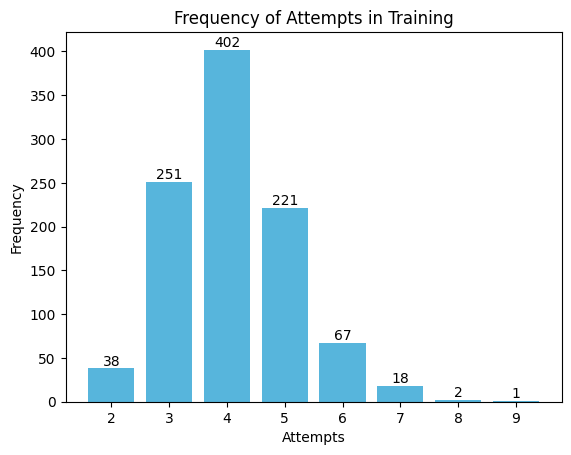

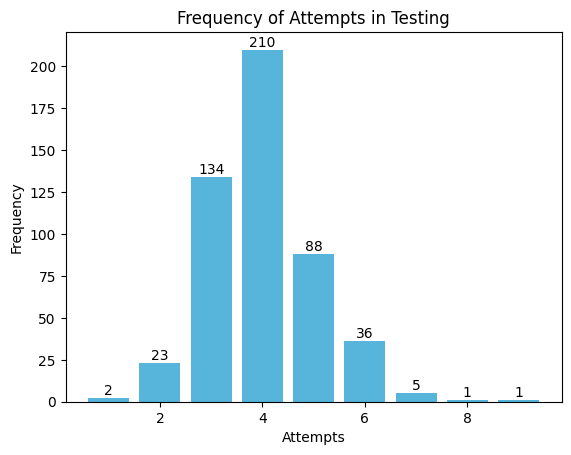

In [12]:
import matplotlib.pyplot as plt

# Training Data Graph
unique_elements, counts = [], []

for item in set(training_attempts):
    unique_elements.append(item)
    counts.append(training_attempts.count(item))

plt.bar(unique_elements, counts, color='#57b5dc')

for i, count in enumerate(counts):
    plt.text(unique_elements[i], count + 0.1, str(count), ha='center', va='bottom')

plt.xlabel('Attempts')
plt.ylabel('Frequency')
plt.title('Frequency of Attempts in Training')

plt.show()

# Testing Data Graph
unique_elements, counts = [], []

for item in set(testing_attempts):
    unique_elements.append(item)
    counts.append(testing_attempts.count(item))

plt.bar(unique_elements, counts, color='#57b5dc')

for i, count in enumerate(counts):
    plt.text(unique_elements[i], count + 0.1, str(count), ha='center', va='bottom')

plt.xlabel('Attempts')
plt.ylabel('Frequency')
plt.title('Frequency of Attempts in Testing')

plt.show()

In [14]:
# Main game loop
attempts = 0
previous_guesses = []

print("Please provide feedback as follows:")
print("0 for MISS, 1 for MISPLACED, and 2 for EXACT.")

while True:
    attempts += 1
    guess = bayesian_choose_word(possible_words, previous_guesses)
    
    # First step to set the first word
    if attempts == 1: guess = best_word
    
    feedback = []
    while True:
        try:
            feedback_input = input(f"Attempt {attempts}: {guess} - Enter feedback (0/1/2): ")
            feedback_input = [int(f) for f in feedback_input]
            if all(f in [0, 1, 2] for f in feedback_input) and len(feedback_input) == 5:
                for i in range(len(feedback_input)):
                    if feedback_input[i] == 0:
                        feedback.append("⬛")
                    elif feedback_input[i] == 1:
                        feedback.append("🟨")
                    elif feedback_input[i] == 2:
                        feedback.append("🟩")
            else:
                print("Invalid feedback. Please provide feedback as 0, 1, or 2.")
        except ValueError:
            print("Invalid feedback. Please provide feedback as 0, 1, or 2.")
        if len(feedback) == len(feedback_input):
            feedback = "".join(feedback)
            break
    previous_guesses.append((guess, feedback))
    print(feedback)

    if feedback.count("🟩") == 5:
        print(f"Congratulations! The word was '{guess}'. It took {attempts} attempts to guess.")
        break

Please provide feedback as follows:
0 for MISS, 1 for MISPLACED, and 2 for EXACT.
⬛⬛⬛🟨🟨
🟨🟩🟨⬛⬛
🟩🟩⬛⬛🟨
🟩🟩🟩🟩🟩
Congratulations! The word was 'resin'. It took 4 attempts to guess.
